In [3]:
# load libraries that will be helpful in exploring and analyzing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
nfl_wr_files = glob.glob('FantasyPros*.csv')

nfl_wr_file_list = []

for file in nfl_wr_files:
  data = pd.read_csv(file)
  nfl_wr_file_list.append(data)

nfl_wr_2013_2022 = pd.concat(nfl_wr_file_list)

# print the length to ensure that all files were glob'd correctly. There should be 240 entries.
print(len(nfl_wr_2013_2022))

240


In [5]:
print(nfl_wr_2013_2022.columns)
print(nfl_wr_2013_2022.dtypes)

Index(['Rank', 'Player', 'REC', 'TGT', 'YDS', 'Y/R', 'LG', '20+', 'TD', 'ATT',
       'YDS.1', 'TD.1', 'FL', 'G', 'FPTS', 'FPTS/G', 'ROST', 'DRAFTED', 'YEAR',
       'YRDrafted', 'YearInLeague', 'DraftedTeam'],
      dtype='object')
Rank              int64
Player           object
REC               int64
TGT               int64
YDS              object
Y/R             float64
LG                int64
20+               int64
TD                int64
ATT               int64
YDS.1             int64
TD.1              int64
FL                int64
G                 int64
FPTS            float64
FPTS/G          float64
ROST             object
DRAFTED           int64
YEAR              int64
YRDrafted         int64
YearInLeague      int64
DraftedTeam      object
dtype: object


In [6]:
nfl_wr_2013_2022.head()

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
0,1,Demaryius Thomas (FA),92,142,"1,430",15.5,78,19,14,0,...,0,16,273.0,17.1,0.10%,1,2013,2010,4,Broncos
1,2,Josh Gordon (FA),87,159,"1,646",18.9,95,30,9,5,...,0,14,270.9,19.4,0.00%,2,2013,2012,2,Browns
2,3,Calvin Johnson (FA),84,157,"1,492",17.8,87,22,12,0,...,1,14,261.2,18.7,0.10%,1,2013,2007,7,Lions
3,4,A.J. Green (FA),98,178,"1,426",14.6,82,18,11,0,...,0,16,257.6,16.1,0.60%,1,2013,2011,3,Bengals
4,5,Brandon Marshall (FA),100,163,"1,295",13.0,44,16,12,0,...,0,16,255.5,16.0,2.60%,4,2013,2006,8,Broncos


Most of these columns are in the correct data type and in one where I can perform analysis on it. The exceptions are YDS and ROST. ROST is the roster percentage of these players at the present date (April, 2023). It is not relevant to our analysis and I therefore will leave it alone. However, YDS is a relevant statistic. It appears that the comma for those with over 1,000 yards on the season caused it to read as an Object rather than an Int. I will use Regex to delete the comma and convert the column to numeric.

In [7]:
nfl_wr_2013_2022['YDS'] = nfl_wr_2013_2022['YDS'].replace(',', '', regex=True)
nfl_wr_2013_2022.YDS = pd.to_numeric(nfl_wr_2013_2022.YDS)

In [8]:
# call dtypes again to ensure that the conversion was successful. YDS should now be int64
nfl_wr_2013_2022.dtypes

Rank              int64
Player           object
REC               int64
TGT               int64
YDS               int64
Y/R             float64
LG                int64
20+               int64
TD                int64
ATT               int64
YDS.1             int64
TD.1              int64
FL                int64
G                 int64
FPTS            float64
FPTS/G          float64
ROST             object
DRAFTED           int64
YEAR              int64
YRDrafted         int64
YearInLeague      int64
DraftedTeam      object
dtype: object

In [9]:
# starting exploration of data by looking at summary statistics
nfl_wr_2013_2022.describe(include = 'all')

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
count,240.000000,240,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240,240.000000,240.000000,240.000000,240.000000,240
unique,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,33
top,NaN,Mike Evans (TB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00%,NaN,NaN,NaN,NaN,Steelers
freq,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,18
mean,12.500000,NaN,87.145833,135.495833,1173.416667,13.663333,61.575000,22.908333,7.891667,3.337500,...,0.587500,15.600000,210.798750,13.555417,NaN,2.550000,2017.500000,2013.570833,4.929167,NaN
std,6.936653,NaN,17.457407,23.597390,224.257924,2.172939,14.453887,9.984503,2.956578,5.690652,...,0.726551,1.085469,37.977887,2.445483,NaN,1.922559,2.878284,4.158369,2.747228,NaN
min,1.000000,NaN,43.000000,66.000000,593.000000,8.600000,28.000000,6.000000,2.000000,0.000000,...,0.000000,9.000000,151.900000,9.500000,NaN,1.000000,2013.000000,2001.000000,1.000000,NaN
25%,6.750000,NaN,75.000000,119.000000,1023.000000,12.100000,51.000000,16.000000,6.000000,0.000000,...,0.000000,15.000000,181.525000,11.800000,NaN,1.000000,2015.000000,2011.000000,3.000000,NaN
50%,12.500000,NaN,85.500000,134.000000,1133.500000,13.500000,60.000000,20.000000,8.000000,1.000000,...,0.000000,16.000000,201.350000,13.000000,NaN,2.000000,2017.500000,2014.000000,5.000000,NaN
75%,18.250000,NaN,99.000000,150.000000,1315.000000,15.100000,72.000000,29.000000,9.250000,5.000000,...,1.000000,16.000000,230.225000,14.825000,NaN,3.000000,2020.000000,2016.000000,7.000000,NaN


In [10]:
# there are 32 teams in the NFL, but the DraftedTeam Column shows 33 unique teams in the column. A further look to see about typos or other errors should be conducted
sorted(nfl_wr_2013_2022.DraftedTeam.unique())

['49ers',
 'Bears',
 'Bengals',
 'Bills',
 'Broncos',
 'Browns',
 'Buccaneers',
 'Cardinal',
 'Cardinals',
 'Chargers',
 'Chiefs',
 'Colts',
 'Commanders',
 'Cowboys',
 'Dolphins',
 'Eagles',
 'Falcons',
 'Giants',
 'Jaguars',
 'Jets',
 'Lions',
 'Packers',
 'Panthers',
 'Patriots',
 'Raiders',
 'Rams',
 'Ravens',
 'Saints',
 'Seahawks',
 'Steelers',
 'Texans',
 'Titans',
 'Vikings']

The above list shows that both 'Cardinal' and 'Cardinals' are listed. The typo comes from not pluralising at least one of the entries. I will use replace to update 'Cardinal' to 'Cardinals.' 

In [11]:
nfl_wr_2013_2022[nfl_wr_2013_2022.DraftedTeam == 'Cardinal']

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
10,11,Christian Kirk (JAC),84,133,1108,13.2,49,27,8,5,...,1,17,199.9,11.8,90.80%,2,2022,2018,5,Cardinal


In [12]:
nfl_wr_2013_2022['DraftedTeam'] = nfl_wr_2013_2022['DraftedTeam'].replace({'Cardinal': 'Cardinals'})

In [13]:
# double check that it successfully replaced Cardinal
nfl_wr_2013_2022[nfl_wr_2013_2022.DraftedTeam == 'Cardinal']

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam


In [14]:
nfl_wr_2013_2022[nfl_wr_2013_2022.DraftedTeam == 'Cardinals']

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
13,14,Anquan Boldin (FA),85,129,1179,13.9,63,19,7,2,...,0,16,203.5,12.7,0.10%,2,2013,2003,11,Cardinals
16,17,Larry Fitzgerald (FA),82,134,954,11.6,75,11,10,2,...,1,16,195.2,12.2,0.20%,1,2013,2004,10,Cardinals
22,23,Michael Floyd (FA),65,112,1041,16.0,91,17,5,0,...,0,16,166.6,10.4,0.00%,1,2013,2012,2,Cardinals
19,20,Anquan Boldin (FA),83,131,1062,12.8,76,14,5,1,...,0,16,178.1,11.1,0.10%,2,2014,2003,12,Cardinals
8,9,Larry Fitzgerald (FA),109,145,1215,11.1,44,17,9,0,...,2,16,226.0,14.1,0.20%,1,2015,2004,12,Cardinals
22,23,John Brown (FA),65,101,1003,15.4,68,11,7,3,...,1,15,175.0,11.7,0.00%,3,2015,2014,2,Cardinals
12,13,Larry Fitzgerald (FA),107,150,1023,9.6,32,8,6,2,...,1,16,190.3,11.9,0.20%,1,2016,2004,13,Cardinals
4,5,Larry Fitzgerald (FA),109,161,1156,10.6,37,16,6,0,...,1,16,206.9,12.9,0.20%,1,2017,2004,14,Cardinals
19,20,John Brown (FA),72,115,1060,14.7,53,26,6,2,...,0,15,183.8,12.3,0.00%,3,2019,2014,6,Cardinals
10,11,Christian Kirk (JAC),84,133,1108,13.2,49,27,8,5,...,1,17,199.9,11.8,90.80%,2,2022,2018,5,Cardinals


In [15]:
# back to exploration of data with summary statistics after fixing Cardinal entry
nfl_wr_2013_2022.describe(include = 'all')

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
count,240.000000,240,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240,240.000000,240.000000,240.000000,240.000000,240
unique,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,32
top,NaN,Mike Evans (TB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00%,NaN,NaN,NaN,NaN,Steelers
freq,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,18
mean,12.500000,NaN,87.145833,135.495833,1173.416667,13.663333,61.575000,22.908333,7.891667,3.337500,...,0.587500,15.600000,210.798750,13.555417,NaN,2.550000,2017.500000,2013.570833,4.929167,NaN
std,6.936653,NaN,17.457407,23.597390,224.257924,2.172939,14.453887,9.984503,2.956578,5.690652,...,0.726551,1.085469,37.977887,2.445483,NaN,1.922559,2.878284,4.158369,2.747228,NaN
min,1.000000,NaN,43.000000,66.000000,593.000000,8.600000,28.000000,6.000000,2.000000,0.000000,...,0.000000,9.000000,151.900000,9.500000,NaN,1.000000,2013.000000,2001.000000,1.000000,NaN
25%,6.750000,NaN,75.000000,119.000000,1023.000000,12.100000,51.000000,16.000000,6.000000,0.000000,...,0.000000,15.000000,181.525000,11.800000,NaN,1.000000,2015.000000,2011.000000,3.000000,NaN
50%,12.500000,NaN,85.500000,134.000000,1133.500000,13.500000,60.000000,20.000000,8.000000,1.000000,...,0.000000,16.000000,201.350000,13.000000,NaN,2.000000,2017.500000,2014.000000,5.000000,NaN
75%,18.250000,NaN,99.000000,150.000000,1315.000000,15.100000,72.000000,29.000000,9.250000,5.000000,...,1.000000,16.000000,230.225000,14.825000,NaN,3.000000,2020.000000,2016.000000,7.000000,NaN


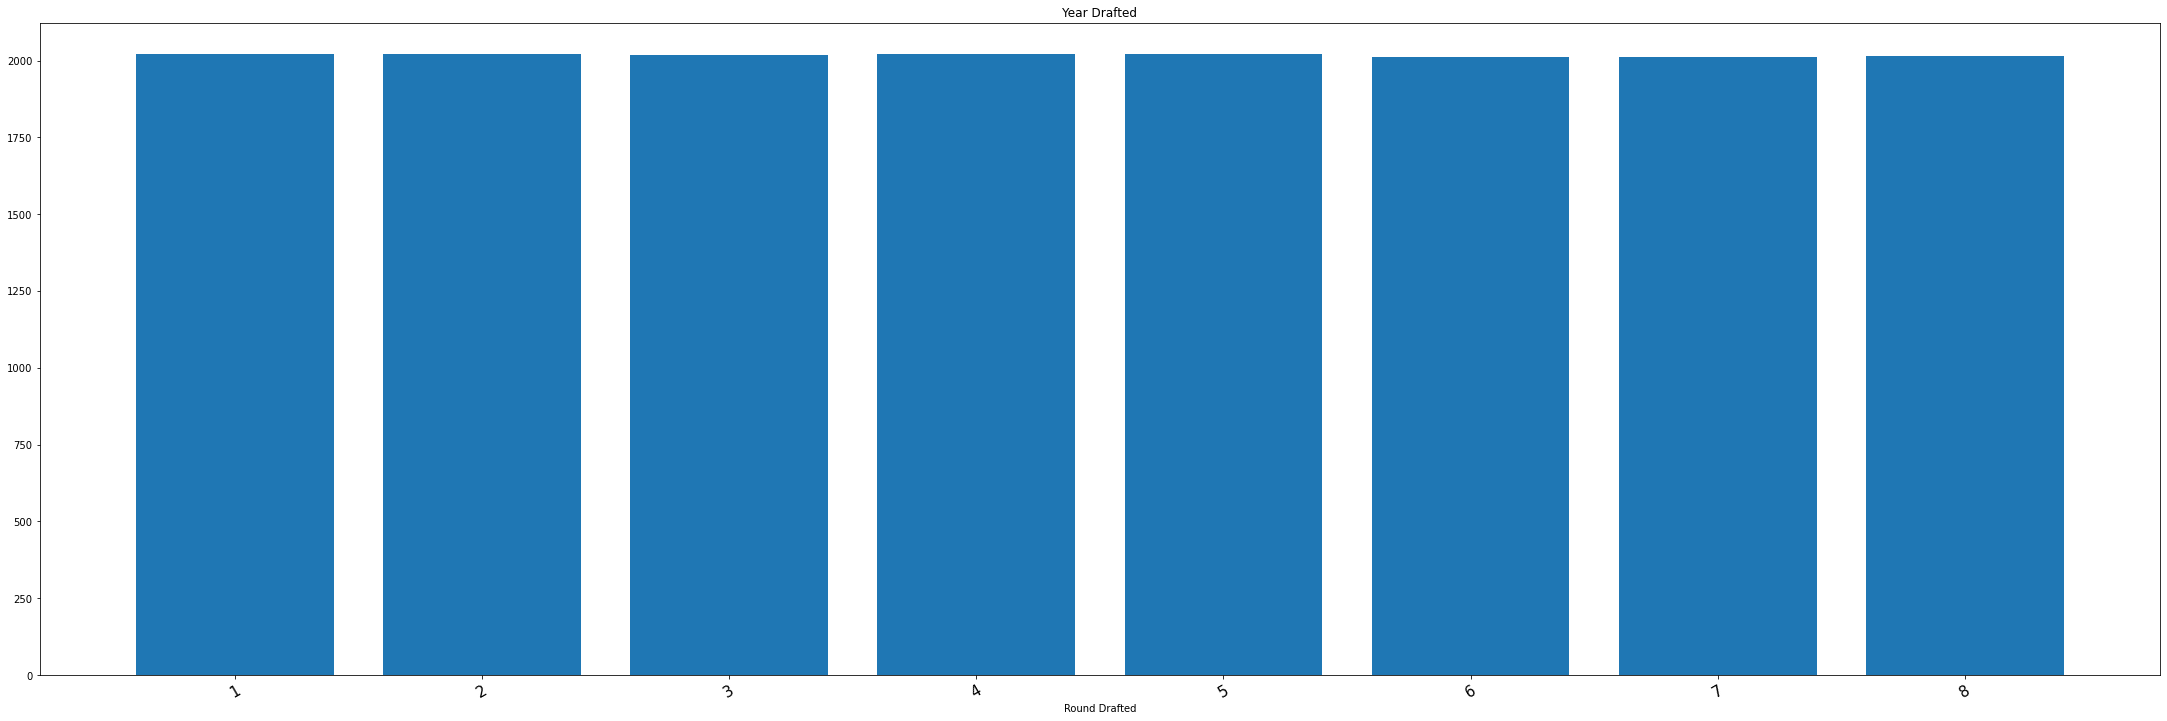

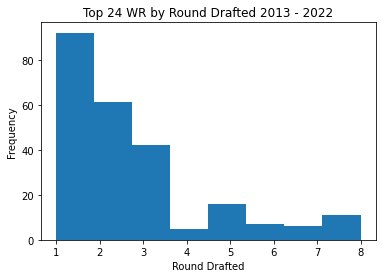

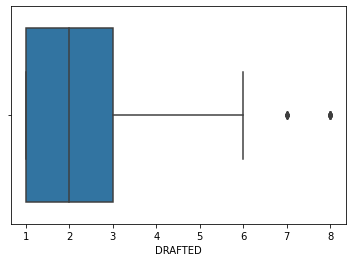

<Figure size 432x288 with 0 Axes>

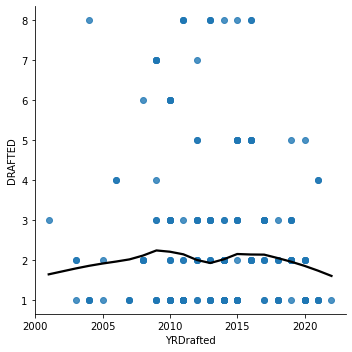

<Figure size 432x288 with 0 Axes>

In [16]:
import seaborn as sns

plt.figure(figsize = (38,12))
plt.bar(nfl_wr_2013_2022.DRAFTED, nfl_wr_2013_2022.YRDrafted)
  # rotate value labels to not overlap and increase font size
plt.xticks(rotation = 30, fontsize = 15)
  # increase variable label font
plt.xlabel('Round Drafted')
plt.title('Year Drafted')
plt.show()
plt.clf()

plt.hist(nfl_wr_2013_2022.DRAFTED, bins = 8)
#plt.hist(exam_scores2, bins = 12, normed = True, histtype = 'step', linewidth = 2)
#plt.legend(['1st Yr Teaching', '2nd Yr Teaching'])
plt.title('Top 24 WR by Round Drafted 2013 - 2022')
plt.xlabel('Round Drafted')
plt.ylabel('Frequency')
plt.show()
plt.clf()

sns.boxplot(data = nfl_wr_2013_2022, x = 'DRAFTED')
plt.show()
plt.title('Round Drafted 2013 - 2022')
plt.xlabel('Round Drafted')
plt.clf()

sns.lmplot(y = 'DRAFTED', x = 'YRDrafted', data = nfl_wr_2013_2022, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

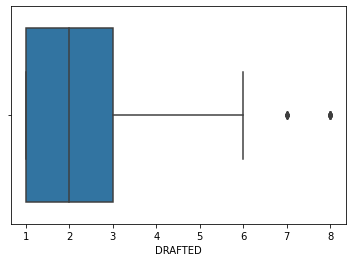

<Figure size 432x288 with 0 Axes>

In [20]:
sns.boxplot(data = nfl_wr_2013_2022, x = 'DRAFTED')
plt.show()
plt.clf()



ValueError: cannot reindex from a duplicate axis

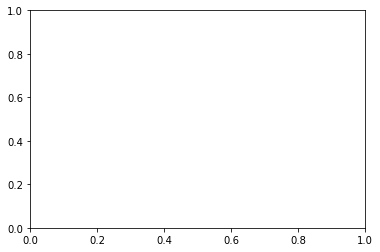

In [23]:
sns.histplot(data = nfl_wr_2013_2022, y = 'REC')
plt.show()
plt.clf()



In [25]:
nfl_wr_2013_2022.columns

Index(['Rank', 'Player', 'REC', 'TGT', 'YDS', 'Y/R', 'LG', '20+', 'TD', 'ATT',
       'YDS.1', 'TD.1', 'FL', 'G', 'FPTS', 'FPTS/G', 'ROST', 'DRAFTED', 'YEAR',
       'YRDrafted', 'YearInLeague', 'DraftedTeam'],
      dtype='object')

In [28]:
nfl_wr_2013_2022[nfl_wr_2013_2022.index.duplicated()]

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
0,1,Antonio Brown (FA),129,181,1698,13.2,63,19,13,4,...,2,16,316.4,19.8,0.30%,6,2014,2010,5,Steelers
1,2,Demaryius Thomas (FA),111,184,1619,14.6,86,25,11,0,...,0,16,285.4,17.8,0.10%,1,2014,2010,5,Broncos
2,3,Jordy Nelson (FA),98,151,1519,15.5,80,19,13,0,...,0,16,278.9,17.4,0.10%,2,2014,2008,7,Packers
3,4,Dez Bryant (FA),88,137,1320,15.0,68,22,16,0,...,0,16,272.0,17.0,2.60%,1,2014,2010,5,Cowboys
4,5,Emmanuel Sanders (FA),101,141,1404,13.9,48,24,9,8,...,0,16,251.3,15.7,0.00%,3,2014,2010,5,Steelers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,20,Chris Godwin (TB),104,142,1023,9.8,44,13,3,3,...,2,15,170.8,11.4,93.80%,3,2022,2017,6,Buccaneers
20,21,Jerry Jeudy (DEN),67,100,972,14.5,67,31,6,4,...,0,15,170.7,11.4,90.40%,1,2022,2020,3,Broncos
21,22,DJ Moore (CHI),63,118,888,14.1,62,27,7,10,...,0,17,167.6,9.9,91.70%,1,2022,2018,5,Panthers
22,23,Michael Pittman Jr. (IND),99,141,925,9.3,28,8,4,3,...,1,16,167.0,10.4,95.60%,2,2022,2020,3,Colts


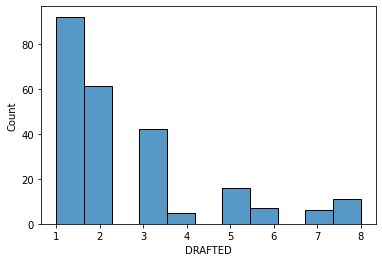

<Figure size 432x288 with 0 Axes>

In [30]:
# above error caused by multiple receivers making the top 24 in multiple years. This is causing the seaborn sns plot to seem them as duplicated values, which made it so it could not plot
Round_Drafted = nfl_wr_2013_2022['DRAFTED']

sns.histplot(data = Round_Drafted)
plt.show()
plt.clf()

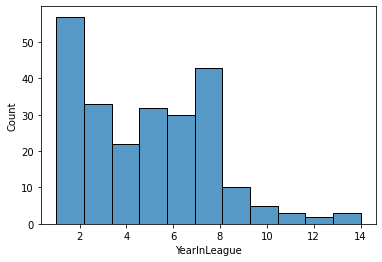

<Figure size 432x288 with 0 Axes>

In [86]:
Year_in_League = nfl_wr_2013_2022['YearInLeague']

sns.histplot(data = Year_in_League)
plt.show()
plt.clf()

In [38]:
len(nfl_wr_2013_2022.Player.unique())

94

In [39]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 1].unique())

33

In [48]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 1])

92

In [40]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 2].unique())

27

In [50]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 2])

61

In [42]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 3].unique())

16

In [51]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 3])

42

In [43]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 4].unique())

3

In [52]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 4])

5

In [44]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 5].unique())

5

In [53]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 5])

16

In [45]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 6].unique())

2

In [54]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 6])

7

In [46]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 7].unique())

2

In [55]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 7])

6

In [47]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 8].unique())

6

In [56]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 8])

11

In [58]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 8])

['Adam Thielen (CAR)',
 'Adam Thielen (CAR)',
 'Adam Thielen (CAR)',
 'Allen Hurns (FA)',
 'Chosen Anderson (MIA)',
 'Chosen Anderson (MIA)',
 'Doug Baldwin (FA)',
 'Doug Baldwin (FA)',
 'Doug Baldwin (FA)',
 'Tyrell Williams (FA)',
 'Wes Welker (FA)']

In [59]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 1])

['A.J. Green (FA)',
 'A.J. Green (FA)',
 'A.J. Green (FA)',
 'A.J. Green (FA)',
 'Amari Cooper (CLE)',
 'Amari Cooper (CLE)',
 'Amari Cooper (CLE)',
 'Amari Cooper (CLE)',
 'Amari Cooper (CLE)',
 'Amari Cooper (CLE)',
 'Andre Johnson (FA)',
 'Brandin Cooks (DAL)',
 'Brandin Cooks (DAL)',
 'Brandin Cooks (DAL)',
 'Brandin Cooks (DAL)',
 'Brandin Cooks (DAL)',
 'Brandin Cooks (DAL)',
 'Brandon Aiyuk (SF)',
 'Calvin Johnson (FA)',
 'Calvin Johnson (FA)',
 'Calvin Johnson (FA)',
 'Calvin Ridley (JAC)',
 'Calvin Ridley (JAC)',
 'CeeDee Lamb (DAL)',
 'CeeDee Lamb (DAL)',
 'CeeDee Lamb (DAL)',
 'DJ Moore (CHI)',
 'DJ Moore (CHI)',
 'DJ Moore (CHI)',
 'DJ Moore (CHI)',
 'DeAndre Hopkins (ARI)',
 'DeAndre Hopkins (ARI)',
 'DeAndre Hopkins (ARI)',
 'DeAndre Hopkins (ARI)',
 'DeAndre Hopkins (ARI)',
 'DeAndre Hopkins (ARI)',
 'DeVante Parker (NE)',
 'DeVonta Smith (PHI)',
 'Demaryius Thomas (FA)',
 'Demaryius Thomas (FA)',
 'Demaryius Thomas (FA)',
 'Demaryius Thomas (FA)',
 'Demaryius Thomas (FA

In [60]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 2])

['A.J. Brown (PHI)',
 'A.J. Brown (PHI)',
 'A.J. Brown (PHI)',
 'Allen Robinson II (PIT)',
 'Allen Robinson II (PIT)',
 'Allen Robinson II (PIT)',
 'Alshon Jeffery (FA)',
 'Alshon Jeffery (FA)',
 'Alshon Jeffery (FA)',
 'Anquan Boldin (FA)',
 'Anquan Boldin (FA)',
 'Chase Claypool (CHI)',
 'Christian Kirk (JAC)',
 'Courtland Sutton (DEN)',
 'DJ Chark Jr. (CAR)',
 'DK Metcalf (SEA)',
 'DK Metcalf (SEA)',
 'DK Metcalf (SEA)',
 'Davante Adams (LV)',
 'Davante Adams (LV)',
 'Davante Adams (LV)',
 'Davante Adams (LV)',
 'Davante Adams (LV)',
 'Davante Adams (LV)',
 'Davante Adams (LV)',
 'DeSean Jackson (FA)',
 'DeSean Jackson (FA)',
 'Deebo Samuel (SF)',
 'Devin Funchess (FA)',
 'Golden Tate (FA)',
 'Golden Tate (FA)',
 'Golden Tate (FA)',
 'Jarvis Landry (FA)',
 'Jarvis Landry (FA)',
 'Jarvis Landry (FA)',
 'Jarvis Landry (FA)',
 'Jarvis Landry (FA)',
 'Jordan Matthews (FA)',
 'Jordy Nelson (FA)',
 'Jordy Nelson (FA)',
 'Jordy Nelson (FA)',
 'Josh Gordon (FA)',
 'JuJu Smith-Schuster (NE)'

In [61]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 3])

['Brandon LaFell (FA)',
 'Chris Godwin (TB)',
 'Chris Godwin (TB)',
 'Chris Godwin (TB)',
 'Cooper Kupp (LAR)',
 'Cooper Kupp (LAR)',
 'Cooper Kupp (LAR)',
 'Diontae Johnson (PIT)',
 'Diontae Johnson (PIT)',
 'Emmanuel Sanders (FA)',
 'Emmanuel Sanders (FA)',
 'Emmanuel Sanders (FA)',
 'Emmanuel Sanders (FA)',
 'Eric Decker (FA)',
 'Eric Decker (FA)',
 'John Brown (FA)',
 'John Brown (FA)',
 'Keenan Allen (LAC)',
 'Keenan Allen (LAC)',
 'Keenan Allen (LAC)',
 'Keenan Allen (LAC)',
 'Keenan Allen (LAC)',
 'Keenan Allen (LAC)',
 'Kenny Golladay (FA)',
 'Kenny Golladay (FA)',
 'Michael Gallup (DAL)',
 'Mike Wallace (FA)',
 'Mike Wallace (FA)',
 'Steve Smith (FA)',
 'T.Y. Hilton (FA)',
 'T.Y. Hilton (FA)',
 'T.Y. Hilton (FA)',
 'T.Y. Hilton (FA)',
 'T.Y. Hilton (FA)',
 'Terrelle Pryor Sr. (FA)',
 'Terry McLaurin (WAS)',
 'Terry McLaurin (WAS)',
 'Tyler Lockett (SEA)',
 'Tyler Lockett (SEA)',
 'Tyler Lockett (SEA)',
 'Tyler Lockett (SEA)',
 'Tyler Lockett (SEA)']

In [62]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 4])

['Amon-Ra St. Brown (DET)',
 'Amon-Ra St. Brown (DET)',
 'Brandon Marshall (FA)',
 'Brandon Marshall (FA)',
 'Brian Hartline (FA)']

In [63]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 5])

['Darnell Mooney (CHI)',
 'Hunter Renfrow (LV)',
 'Marvin Jones Jr. (DET)',
 'Marvin Jones Jr. (DET)',
 'Stefon Diggs (BUF)',
 'Stefon Diggs (BUF)',
 'Stefon Diggs (BUF)',
 'Stefon Diggs (BUF)',
 'Stefon Diggs (BUF)',
 'Stefon Diggs (BUF)',
 'Tyreek Hill (MIA)',
 'Tyreek Hill (MIA)',
 'Tyreek Hill (MIA)',
 'Tyreek Hill (MIA)',
 'Tyreek Hill (MIA)',
 'Tyreek Hill (MIA)']

In [64]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 6])

['Antonio Brown (FA)',
 'Antonio Brown (FA)',
 'Antonio Brown (FA)',
 'Antonio Brown (FA)',
 'Antonio Brown (FA)',
 'Antonio Brown (FA)',
 'Pierre Garcon (FA)']

In [65]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 7])

['Julian Edelman (FA)',
 'Julian Edelman (FA)',
 'Julian Edelman (FA)',
 'Julian Edelman (FA)',
 'Julian Edelman (FA)',
 'Rishard Matthews (FA)']

In [66]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 1])

['A.J. Brown (PHI)',
 'Amari Cooper (CLE)',
 'Amon-Ra St. Brown (DET)',
 'Calvin Ridley (JAC)',
 'CeeDee Lamb (DAL)',
 'Chase Claypool (CHI)',
 'Garrett Wilson (NYJ)',
 "Ja'Marr Chase (CIN)",
 'Jaylen Waddle (MIA)',
 'JuJu Smith-Schuster (NE)',
 'Justin Jefferson (MIN)',
 'Keenan Allen (LAC)',
 'Kelvin Benjamin (FA)',
 'Michael Thomas (NO)',
 'Mike Evans (TB)',
 'Odell Beckham Jr. (BAL)',
 'Tyreek Hill (MIA)']

In [68]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague > 8])

['Andre Johnson (FA)',
 'Anquan Boldin (FA)',
 'Anquan Boldin (FA)',
 'Antonio Brown (FA)',
 'Brandon Marshall (FA)',
 'Calvin Johnson (FA)',
 'Davante Adams (LV)',
 'Emmanuel Sanders (FA)',
 'Jordy Nelson (FA)',
 'Julian Edelman (FA)',
 'Julian Edelman (FA)',
 'Julio Jones (FA)',
 'Keenan Allen (LAC)',
 'Larry Fitzgerald (FA)',
 'Larry Fitzgerald (FA)',
 'Larry Fitzgerald (FA)',
 'Larry Fitzgerald (FA)',
 'Marvin Jones Jr. (DET)',
 'Mike Evans (TB)',
 'Roddy White (FA)',
 'Steve Smith (FA)',
 'Vincent Jackson (FA)',
 'Wes Welker (FA)']

In [69]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague > 8])

23

In [84]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 9])

10

In [78]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 8])

20

In [74]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 7])

23

In [75]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 6])

30

In [76]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 5])

32

In [79]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 4])

22

In [81]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 3])

33

In [82]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 2])

40

In [83]:
len(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 1])

17

In [93]:
sorted(nfl_wr_2013_2022.DraftedTeam)

['49ers',
 '49ers',
 '49ers',
 '49ers',
 'Bears',
 'Bears',
 'Bears',
 'Bears',
 'Bengals',
 'Bengals',
 'Bengals',
 'Bengals',
 'Bengals',
 'Bengals',
 'Bengals',
 'Bengals',
 'Bengals',
 'Bengals',
 'Bengals',
 'Bengals',
 'Bills',
 'Bills',
 'Bills',
 'Bills',
 'Broncos',
 'Broncos',
 'Broncos',
 'Broncos',
 'Broncos',
 'Broncos',
 'Broncos',
 'Broncos',
 'Broncos',
 'Broncos',
 'Broncos',
 'Browns',
 'Buccaneers',
 'Buccaneers',
 'Buccaneers',
 'Buccaneers',
 'Buccaneers',
 'Buccaneers',
 'Buccaneers',
 'Buccaneers',
 'Buccaneers',
 'Buccaneers',
 'Buccaneers',
 'Buccaneers',
 'Cardinals',
 'Cardinals',
 'Cardinals',
 'Cardinals',
 'Cardinals',
 'Cardinals',
 'Cardinals',
 'Cardinals',
 'Cardinals',
 'Cardinals',
 'Chargers',
 'Chargers',
 'Chargers',
 'Chargers',
 'Chargers',
 'Chargers',
 'Chargers',
 'Chargers',
 'Chargers',
 'Chargers',
 'Chargers',
 'Chiefs',
 'Chiefs',
 'Chiefs',
 'Chiefs',
 'Chiefs',
 'Chiefs',
 'Colts',
 'Colts',
 'Colts',
 'Colts',
 'Colts',
 'Colts',
 'Co

In [116]:
nfl_wr_2013_2022.Player.value_counts()

Mike Evans (TB)            9
Davante Adams (LV)         7
Brandin Cooks (DAL)        6
Julio Jones (FA)           6
DeAndre Hopkins (ARI)      6
                          ..
Terrelle Pryor Sr. (FA)    1
Torrey Smith (FA)          1
Devin Funchess (FA)        1
Nelson Agholor (BAL)       1
Jerry Jeudy (DEN)          1
Name: Player, Length: 94, dtype: int64

In [117]:
nfl_wr_2013_2022.DRAFTED.value_counts()

1    92
2    61
3    42
5    16
8    11
6     7
7     6
4     5
Name: DRAFTED, dtype: int64

In [118]:
nfl_wr_2013_2022.YearInLeague.value_counts()

2     40
3     33
5     32
6     30
7     23
4     22
8     20
1     17
9     10
10     5
11     3
14     2
12     2
13     1
Name: YearInLeague, dtype: int64

In [119]:
nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 1].value_counts()

Mike Evans (TB)            9
DeAndre Hopkins (ARI)      6
Julio Jones (FA)           6
Amari Cooper (CLE)         6
Brandin Cooks (DAL)        6
Demaryius Thomas (FA)      5
Odell Beckham Jr. (BAL)    4
Larry Fitzgerald (FA)      4
DJ Moore (CHI)             4
A.J. Green (FA)            4
Dez Bryant (FA)            3
Calvin Johnson (FA)        3
Justin Jefferson (MIN)     3
CeeDee Lamb (DAL)          3
Kelvin Benjamin (FA)       2
Michael Crabtree (FA)      2
Jaylen Waddle (MIA)        2
Calvin Ridley (JAC)        2
Mike Williams (LAC)        2
Ja'Marr Chase (CIN)        2
Jeremy Maclin (FA)         2
Marquise Brown (ARI)       1
DeVonta Smith (PHI)        1
Garrett Wilson (NYJ)       1
Brandon Aiyuk (SF)         1
Sammy Watkins (FA)         1
DeVante Parker (NE)        1
Nelson Agholor (BAL)       1
Roddy White (FA)           1
Michael Floyd (FA)         1
Kendall Wright (FA)        1
Andre Johnson (FA)         1
Jerry Jeudy (DEN)          1
Name: Player, dtype: int64

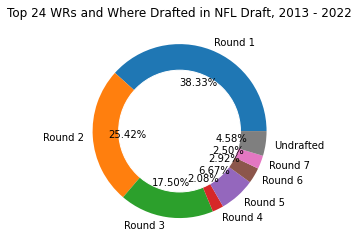

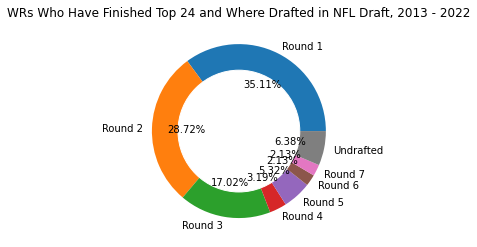

<Figure size 432x288 with 0 Axes>

In [138]:
top_24_by_round = [92,61,42,5,16,7,6,11]
top_24_unique_by_round = [33,27,16,3,5,2,2,6]

round_drafted = ['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 6', 'Round 7', 'Undrafted']
plt.pie(top_24_by_round, labels = round_drafted, autopct='%.2f%%')
plt.title('Top 24 WRs and Where Drafted in NFL Draft, 2013 - 2022')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.clf()

plt.pie(top_24_unique_by_round, normalize = True, labels = round_drafted, autopct='%.2f%%')
plt.title('WRs Who Have Finished Top 24 and Where Drafted in NFL Draft, 2013 - 2022')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.clf()

In [99]:
nfl_wr_2013_2022.columns

Index(['Rank', 'Player', 'REC', 'TGT', 'YDS', 'Y/R', 'LG', '20+', 'TD', 'ATT',
       'YDS.1', 'TD.1', 'FL', 'G', 'FPTS', 'FPTS/G', 'ROST', 'DRAFTED', 'YEAR',
       'YRDrafted', 'YearInLeague', 'DraftedTeam'],
      dtype='object')

In [146]:
nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 1].value_counts()

Mike Evans (TB)            9
DeAndre Hopkins (ARI)      6
Julio Jones (FA)           6
Amari Cooper (CLE)         6
Brandin Cooks (DAL)        6
Demaryius Thomas (FA)      5
Odell Beckham Jr. (BAL)    4
Larry Fitzgerald (FA)      4
DJ Moore (CHI)             4
A.J. Green (FA)            4
Dez Bryant (FA)            3
Calvin Johnson (FA)        3
Justin Jefferson (MIN)     3
CeeDee Lamb (DAL)          3
Kelvin Benjamin (FA)       2
Michael Crabtree (FA)      2
Jaylen Waddle (MIA)        2
Calvin Ridley (JAC)        2
Mike Williams (LAC)        2
Ja'Marr Chase (CIN)        2
Jeremy Maclin (FA)         2
Marquise Brown (ARI)       1
DeVonta Smith (PHI)        1
Garrett Wilson (NYJ)       1
Brandon Aiyuk (SF)         1
Sammy Watkins (FA)         1
DeVante Parker (NE)        1
Nelson Agholor (BAL)       1
Roddy White (FA)           1
Michael Floyd (FA)         1
Kendall Wright (FA)        1
Andre Johnson (FA)         1
Jerry Jeudy (DEN)          1
Name: Player, dtype: int64

In [139]:
nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 2].value_counts()

Davante Adams (LV)           7
Jarvis Landry (FA)           5
Michael Thomas (NO)          4
Golden Tate (FA)             3
Robert Woods (HOU)           3
JuJu Smith-Schuster (NE)     3
DK Metcalf (SEA)             3
Alshon Jeffery (FA)          3
Allen Robinson II (PIT)      3
Jordy Nelson (FA)            3
A.J. Brown (PHI)             3
Michael Pittman Jr. (IND)    2
Tee Higgins (CIN)            2
Anquan Boldin (FA)           2
DeSean Jackson (FA)          2
Tyler Boyd (CIN)             2
Courtland Sutton (DEN)       1
Deebo Samuel (SF)            1
Chase Claypool (CHI)         1
Josh Gordon (FA)             1
DJ Chark Jr. (CAR)           1
Devin Funchess (FA)          1
Jordan Matthews (FA)         1
Randall Cobb (FA)            1
Torrey Smith (FA)            1
Vincent Jackson (FA)         1
Christian Kirk (JAC)         1
Name: Player, dtype: int64

In [140]:
nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 3].value_counts()

Keenan Allen (LAC)         6
T.Y. Hilton (FA)           5
Tyler Lockett (SEA)        5
Emmanuel Sanders (FA)      4
Chris Godwin (TB)          3
Cooper Kupp (LAR)          3
Eric Decker (FA)           2
Mike Wallace (FA)          2
John Brown (FA)            2
Kenny Golladay (FA)        2
Terry McLaurin (WAS)       2
Diontae Johnson (PIT)      2
Steve Smith (FA)           1
Brandon LaFell (FA)        1
Terrelle Pryor Sr. (FA)    1
Michael Gallup (DAL)       1
Name: Player, dtype: int64

In [141]:
nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 4].value_counts()

Brandon Marshall (FA)      2
Amon-Ra St. Brown (DET)    2
Brian Hartline (FA)        1
Name: Player, dtype: int64

In [142]:
nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 5].value_counts()

Tyreek Hill (MIA)         6
Stefon Diggs (BUF)        6
Marvin Jones Jr. (DET)    2
Hunter Renfrow (LV)       1
Darnell Mooney (CHI)      1
Name: Player, dtype: int64

In [143]:
nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 6].value_counts()

Antonio Brown (FA)    6
Pierre Garcon (FA)    1
Name: Player, dtype: int64

In [144]:
nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 7].value_counts()

Julian Edelman (FA)      5
Rishard Matthews (FA)    1
Name: Player, dtype: int64

In [145]:
nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 8].value_counts()

Doug Baldwin (FA)        3
Adam Thielen (CAR)       3
Chosen Anderson (MIA)    2
Wes Welker (FA)          1
Allen Hurns (FA)         1
Tyrell Williams (FA)     1
Name: Player, dtype: int64

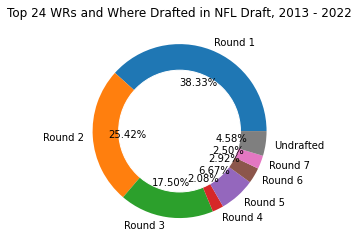

In [162]:
# create a donut chart and save the figure to share for the top WRs and where they were originally drafted

round_drafted = ['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 6', 'Round 7', 'Undrafted']
plt.pie(top_24_by_round, labels = round_drafted, autopct='%.2f%%')
plt.title('Top 24 WRs and Where Drafted in NFL Draft, 2013 - 2022')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('top24_WRs_RoundDrafted.png', dpi=300, bbox_inches='tight', facecolor='#f2f2f2')
plt.show()


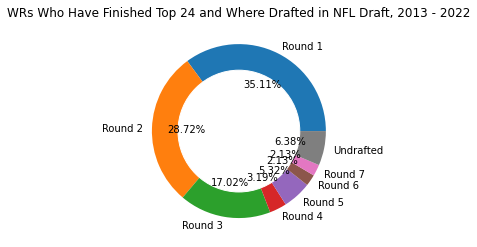

In [160]:
# create a donut chart and save the figure to share for the top unique WRs and where they were originally drafted

plt.pie(top_24_unique_by_round, normalize=True, labels=round_drafted, autopct='%.2f%%')
plt.title('WRs Who Have Finished Top 24 and Where Drafted in NFL Draft, 2013 - 2022')
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('WRs_WithTop24Finish_RoundDrafted.png', dpi=300, bbox_inches='tight', facecolor='#f2f2f2')
plt.show()